# Project 5: Goals and Deliverables

The goals of this assignment are:
* To work with the object oriented version of our corpus code.
* To modify a web app that we can use to analyze text data.
* To finetune a transformer model and write a model card for it.

Here are the steps you should do to successfully complete this project:
1. Check out the assignment from Github. 
2. Make a codespace with at least 8GB of RAM (preferably more!).
3. Copy your `spacy_on_corpus.py` from project 4b.
4. Copy the anvil callable functions and your API key from project 4b into the file `server.py`.
5. Complete all the instructions in this notebook. Make sure to answer all questions, and to commit the notebook in a "run" state!
6. Edit the README.md file. Provide your name, your class year, links to/descriptions of any extensions and a list of resources you used. 
7. Commit your code often. We will take the last commit before the deadline as your submission of the project.

Possible extensions (from least points to most points):
* Modify the `render_document_sentiment` method you implemented for this project to have a third column, `Aspect`. Fill it with the first keyphrase extracted from the sentence using the keyphrase extraction algorithm from project 4b, or with the first noun chunk in the sentence. Explain whether this is better than the baseline implementation for this project, and why.
* Finetune a different model (other than distilbert-cased) for the sentence sentiment task.
* Finetune a transformer model for a different NLP task. Add it to your web app.
* Your other ideas are welcome! If you'd like to discuss one with Dr Stent, feel free.

# Set Up



1. Copy your `spacy_on_corpus.py` from project 4b.
2. Copy the anvil callable functions from project 4b into the file `server.py`.
3. Run % `pip install -r requirements.txt`.

## Make Sure We Can Work With .py Files We Are Editing

Run the code cell below.

In [1]:
# Automatically reload your external source code
%load_ext autoreload
%autoreload 2

## Get a Corpus

In the code cell below, build a corpus using `creator.jsonl`.

## Test the Server

There are now two ways to start our server:

1. From a notebook: import `server`, then call the `run` function.
2. On the terminal: % `python server`.

In the code cell below, try the first way.

If the above code cells don't work, then you haven't followed the set up instructions. Go back to that section.

# Finetune a Transformer Model


We can currently get document-level sentiment but quite often a movie review is nuanced: some sentences say good things about some aspects of the movie, while others say bad things about other aspects. In this project, we will finetune a transformer model on the sentiment of sentences from movie reviews, and then add to our webapp the ability to see sentence-level sentiment for a document.

## Get Some Labeled Data

We are going to use the (SST)[https://huggingface.co/datasets/sst] dataset. Note the datasheet!

First, we download the dataset.

In [32]:
# datasets is a huggingface python package that makes it easy to download huggingface datasets
from datasets import load_dataset

# download the sst dataset
raw_sst = load_dataset("glue", "sst2")

# make it smaller for testing; once everything is working, train on all the data by commenting this line out and rerunning the notebook
raw_sst = raw_sst.filter(lambda e, i: i<1000, with_indices=True)

Filter: 100%|██████████| 1821/1821 [00:00<00:00, 243266.16 examples/s]


Then, we look at the dataset.

**ALWAYS LOOK AT YOUR DATA**

In [33]:
# look at the sst dataset
print(raw_sst)
# look at the sst training data
raw_sst['train']
# look at the sst training data sentences. Note each data point is a pre-tokenized sentence.
raw_sst['train']['sentence']
# look at the sst training data labels.
raw_sst['train']['label']

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1000
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1000
    })
})


[0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,


Questions:

1. *For supervised machine learning, each data point has to have what?*
outputs as features and Labels 
2. *Why do we split data for supervised machine learning into train, dev (validation) and test?*
We split data to go through different stages of the ml process. We split at an 80-10-10 ratio
3. *How many datapoints are in the dataset altogether (train, validation and test)?*
36,000 datapoints 

## Tokenize the Data

We will use the small `distilbert` model for this project. So we want to use its tokenizer.

In [34]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-cased")

Next we need to tokenize our data using that tokenizer.

In [35]:
def transformer_tokenize(example):
    """Tokenizes the input data using the designated transformer tokenizer.

    :param example: a text
    :type example: str
    """
    return tokenizer(example['sentence'], padding="max_length", truncation=True)

# this tokenizes the train, validation and test sets
tokenized_sst = raw_sst.map(transformer_tokenize, batched=True)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map: 100%|██████████| 1000/1000 [00:00<00:00, 7159.37 examples/s]


Questions:

4. *When we looked at our data, we saw that it was tokenized (kind of like spaCy tokenizes). Why do we need to tokenize again with the transformer tokenizer?*
It's taylored for transformer models so that they performm with higher accuracy
5. *Recall that a transformer has fixed width input. Look at the tokenize function above.*
   * *If the input text is shorter, what does the toknizer do?*
   it will pad it if it is too short
   * *If the input text is longer, what does the tokenizer do?*
   it will truncate if it is too long
6. *What type of supervised machine learning could we do if our labels are numeric?*
We can run regressions like a linear regression. 


## Get a Transformer Model

We will use the distilbert model for efficiency.

*Our classification task has how many labels?*

In [36]:
from transformers import AutoModelForSequenceClassification

num_labels = 2
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-cased", num_labels=num_labels)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.weight', 'classifier.bias', 'pre_classifier.weight', 'pre_classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


## Instantiate and Run a Trainer

Huggingface gives us a nice clean way to train: the `Trainer`. Each trainer has training arguments - where you can set hyperparameters. We will make a default set of training arguments.

In [37]:
from transformers import TrainingArguments

training_args = TrainingArguments(output_dir="sst_model", evaluation_strategy="epoch")

We will add an accuracy metric from the `evaluate` package so we can see accuracy while training.

In [38]:
# this huggingf
import evaluate
import numpy as np

# Setup evaluation 
accuracy_metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    """Compute the metric!"""
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return accuracy_metric.compute(predictions=predictions, references=labels)

Then we will make a trainer using the model, the training arguments, our train and our dev data.

In [39]:
from transformers import Trainer

trainer = Trainer(model=model, args=training_args, train_dataset=tokenized_sst["train"], eval_dataset=tokenized_sst["validation"], compute_metrics=compute_metrics)

And finally, we train.

**This step takes a long time.** If you want to speed it up, you will need a GPU! But codespaces don't currently have GPU options. So:

1. Download this notebook.
2. Open [https://colab.research.google.com](https://colab.research.google.com).
3. Upload the notebook.
4. Add a cell at the top of the notebook and in it type:
```
!pip install datasets
!pip install transformers[torch]
!pip install evaluate
```
4. In the Runtime menu, choose `GPU`.
5. Run the notebook there to train a model.
6. Download the trained model.
   * in a code cell, type `!tar -czf model.tgz sst-model`
   * download model.tgz
7. Upload the trained model here in the codespace.
   * upload model.tgz
   * in the terminal, type `!tar -xzf model.tgz`

After this course, you can always still use codespaces, and I recommend it because of the tight integration with Github (so your code is saved!). You can *also* always use Colab. If you use Colab, your notebooks will be backed up in your Google Drive, but *no other files that you generated in colab are saved*.

In [40]:
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.449233,0.794725
2,No log,0.694175,0.819954
3,No log,0.722640,0.825688


TrainOutput(global_step=375, training_loss=0.2709336954752604, metrics={'train_runtime': 3771.1289, 'train_samples_per_second': 0.796, 'train_steps_per_second': 0.099, 'total_flos': 397402195968000.0, 'train_loss': 0.2709336954752604, 'epoch': 3.0})

And we save the trained model.

In [41]:
trainer.save_model("sst-model")


# Evaluate

Now we should evaluate the model.

First we load the model.

In [42]:
from transformers import pipeline

sentence_sentiment = pipeline("text-classification", model="sst-model", tokenizer=tokenizer)

Then we try the model on a couple of sample sentences to sanity check.

In [43]:
print(sentence_sentiment("This movie was awful!"))

print(sentence_sentiment("This movie was great!"))

[{'label': 'LABEL_0', 'score': 0.9991024732589722}]
[{'label': 'LABEL_1', 'score': 0.9972257018089294}]


Now we want to run the model on each of our test data points.

Notice that the model outputs 'LABEL_0' or 'LABEL_1' while the data has labels 0 and 1. So *you* should define a function to map the labels.

In [45]:
def get_label(output):
    """Gets a numeric label for the output from the classifier.
        Sample output from classifier:  [{'label': 'LABEL_0', 'score': 0.61}] corresponds to label 0
        Sample output from classifier: [{'label': 'LABEL_1', 'score': 0.72}] corresponds to label 1  

        :param output: the output from the classifier
        :type output: list[dict]
        :returns: a label
        :rtype: int
    """
    if output[0]['label'] == 'LABEL_0':
        return 0
    else:
        return 1

Now run the classifier on each dev data point.

Each element in `raw_sst['validation']` is a dictionary with keys `idx`, `sentence` and `label`. For each dev data point, you should make a new dictionary with keys `idx`, `sentence`, `label` and `pred` (for the output from the classifier). Add this dictionary to the list of results.

In [46]:
results = []
# your work here!
for datum in raw_sst['validation']:
    output = sentence_sentiment(datum['sentence'])
    results.append({'idx': datum['idx'], 'sentence': datum['sentence'], 'label': datum['label'], 'pred': get_label(output)})


Now we have:

* `gold` labels, and
* model predictions

for each of the dev data points.

We will calculate two metrics:

1. accuracy
2. confusion matrix

## Accuracy

In the code cell below, implement the `accuracy` function. The accuracy of a classifier is the number of correctly labeled data points divided by the total number of data points.

In [47]:
def accuracy(results):
    """ Returns the accuracy of a list of classifier results

    :param results: a list of dictionaries. Each dictionary contains, at minimum, the keys 'label' and 'pred'
    :type results: list[dict]
    :returns: accuracy
    :rtype: float
    """
    correct_data = 0
    for datum in results:
        if datum['label'] == datum['pred']:
            correct_data += 1
    accuracy = correct_data / len(results)
    return accuracy





Now print the accuracy of the finetuned model.

In [48]:
print(accuracy(results))

0.8256880733944955


Questions:

7. *How accurate is the finetuned model?*
.8256 percent accuracy
8. *What would be the accuracy of a simple model that flipped a coin?*
.50

## Confusion Matrix

In the code cell below, implement the `confusion_matrix` function. A confusion matrix for a classifier is like a spreadsheet or table that has all the labels along the rows and columns. Each cell contains the number of data points where the gold label corresponded to that row label, and the predicted label to that column label.

For example, for labels `TRUE` and `FALSE`, here is a possible confusion matrix:

| | TRUE | FALSE |
| --- | ---- | ----- |
| TRUE | 5 | 2   |
| FALSE | 1 | 4   | 

This says that there were 7 total data points with gold label `TRUE`, of which 5 had predicted label `TRUE`. There were 5 total data points with gold label `FALSE`, of which 4 had predicted label `FALSE`. This is a pretty good classifier!

Your confusion matrix will be a dictionary of dictionaries. Here's the above confusion matrix as a dictionary of dictionaries:
```
cf = {'TRUE': {'TRUE': 5, 'FALSE': 2}, 'FALSE': {'TRUE': 1, 'FALSE': 4}}
```

In [49]:
def confusion_matrix(results):
    """ Returns the confusion matrix for a list of classifier results

    :param results: a list of dictionaries. Each dictionary contains, at minimum, the keys 'label' and 'pred'
    :type results: list[dict]
    :returns: confusion matrix
    :rtype: dict
    """
    confusion = {}
    for datum in results: 
        if datum['label'] not in confusion: 
            confusion[datum['label']] = {}
        if datum['pred'] not in confusion[datum['label']]:
            confusion[datum['label']][datum['pred']] = 0
        confusion[datum['label']][datum['pred']] += 1
    return confusion

            



Now print the confusion matrix for the finetuned model.

In [50]:
print(confusion_matrix(results))

{1: {1: 393, 0: 51}, 0: {0: 327, 1: 101}}


(If you become an advanced transformers tool builder, you could instead use the `evaluate` package made by the huggingface team.)

Questions:

9. *For which class (0 or 1, negative or positive sentiment) is the finetuned model most accurate?*
It is most accurate for positive sentiments. 
10. *Why do you say that?*
I say this because the ratio of right to wrong for positive sentiments was higher than for negative sentiments


# Add Your Finetuned Model to Your Webapp



1. Create a class attribute in the `corpus` class for loading your model.


2. Create an instance method, `get_sentence_level_sentiment`, in the `corpus` class. This method should return a list of pairs `(sentence, label)` where `label` 
 is the sentiment label for the sentence. Test it in the code cell below.


In [2]:
from spacy_on_corpus import corpus
my_corpus = corpus()
my_corpus = corpus.build_corpus('creator.jsonl', my_corpus= my_corpus)


/home/codespace/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [4]:
print(my_corpus.get_sentence_level_sentiment())

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


[("It's a shame that the weak writing undermines The Creator so much, as there are some intriguing concepts that could have been compelling if executed better.", 'LABEL_0'), ("For the most part, it's a mishmash of other movies with not much to say on its own.", 'LABEL_0'), ("Although 'New Asia' is America's enemy, we are encouraged to transfer our sympathies in that direction.", 'LABEL_1'), ('Yet the abiding vision of Asian life is a mass of touristic clichés seen through western eyes.', 'LABEL_1'), ("The Creator has astonishing visuals, but that's where its charm ends.", 'LABEL_1'), ('While the performances are strong, thrilling elements of the film swap actual excitement for a more traditional science fiction film that pays tribute to its influences and little else.', 'LABEL_1'), ('The Creator is incredibly immersive from a visual and world building perspective, however it leaves a lot to be desired with its writing.', 'LABEL_1'), ("The Creator is a gorgeous feature in all the ways t

3. Create an instance method, `render_document_sentiments`, in the `corpus` class. This method should return a markdown table for the document containing the sentences and their corresponding sentiment labels. At the bottom, it should have an extra row where the "sentence" is the string "document" and the label is the document-level sentiment (*not* from your finetuned model; from project 4b). Test it in the code cell below.


In [11]:
print(my_corpus.render_doc_sentiments('1'))

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.


It's a shame that the weak writing undermines The Creator so much, as there are some intriguing concepts that could have been compelling if executed better. For the most part, it's a mishmash of other movies with not much to say on its own.
## Sentiments
| Sentence | Label |
| ------ | ------ | 
| It's a shame that the weak writing undermines The Creator so much, as there are some intriguing concepts that could have been compelling if executed better. | LABEL_0 |
| For the most part, it's a mishmash of other movies with not much to say on its own. | LABEL_0 |
| It's a shame that the weak writing undermines The Creator so much, as there are some intriguing concepts that could have been compelling if executed better. For the most part, it's a mishmash of other movies with not much to say on its own. | NEGATIVE |



4. In `server.py`, add an anvil callable function, `get_doc_sentiment_markdown`, that calls `render_document_sentiments`. Test it in the code cell below.


In [13]:
import server 
server.get_doc_sentiment_markdown('1')

It's a shame that the weak writing undermines The Creator so much, as there are some intriguing concepts that could have been compelling if executed better. For the most part, it's a mishmash of other movies with not much to say on its own.


"## Sentiments\n| Sentence | Label |\n| ------ | ------ | \n| It's a shame that the weak writing undermines The Creator so much, as there are some intriguing concepts that could have been compelling if executed better. | LABEL_0 |\n| For the most part, it's a mishmash of other movies with not much to say on its own. | LABEL_0 |\n| It's a shame that the weak writing undermines The Creator so much, as there are some intriguing concepts that could have been compelling if executed better. For the most part, it's a mishmash of other movies with not much to say on its own. | NEGATIVE |\n"

: 

5. Add a radio button 'Sentiment' to the `Analyze Document` form in your web app; when clicked, this should call `get_document_sentiment_markdown`. Paste a screenshot here:
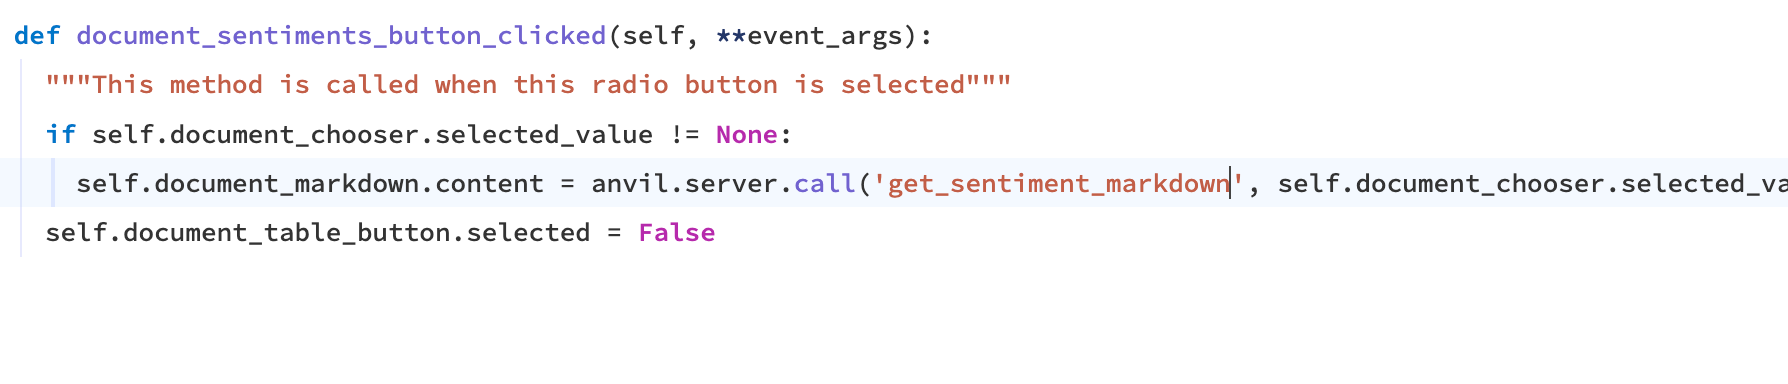
I couldn't get anvil to work for this but implemented all necessary functions and they all worked. 

# Model Card

***ALWAYS DOCUMENT YOUR MODEL***

Complete the model card reading in Perusall.

Then, complete the model card in `model_card.md` for your finetuned model.

# Resources

* https://livingdatalab.com/posts/2023-04-23-fine-tuning-a-sentiment-analysis-model-with-huggingface.html
* https://huggingface.co/docs/transformers/v4.15.0/model_sharing
* https://huggingface.co/docs/datasets/process